In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
from matplotlib.legend_handler import HandlerLine2D

In [2]:
def readfile(filename):
    # open file
    f = open(filename,'r')
    
    # read header info line by line 

    # read first two lines FIRST 
    line = f.readline()
    label, value = line.split()
    time = float(value)

    line = f.readline()
    label, value = line.split()
    total = float(value)
    
    # close file
    f.close()

    # read the remainder of the file, skipping 
    #the first 3 lines and storing 
    #the values as arrays with the column headers 
    #given in line 4
    data = np.genfromtxt(filename, dtype=None, names=True, skip_header=3)
    
    # this will return the time of the snapshot, 
    #total number of particles 
    #and an array that stores the remainder of the data. 
    return time, total, data

In [3]:
def COMDef(x,y,z,m):
    # compute the center of mass 
    # note: since all particles have the same
    # mass when consider only one type
    # this is equivalently  np.sum(x)/len(x)
    
    # xcomponent
    cXP = np.sum(x*m)/np.sum(m)
    # ycomponent
    cYP = np.sum(y*m)/np.sum(m)
    # zcomponent
    cZP = np.sum(z*m)/np.sum(m)
    
    return cXP,cYP,cZP

In [4]:
# function to compute the POSITION and 
# VELOCITY of the center of mass of Galaxy X 
#using particles of Type Y at SnapNumber Z 

# input: String with Galaxy Name
# input: 1,2,3 indicating particle type
# input: Integer with Snapshot Number  e.g. 0,256,700
# input:  Delta = tolerance for the iteration
# input:  dec = factor by which to decrease the search radius
# Return: Array of  ( time, x, y, z) of center of mass 

def COM(galaxy, PType, Snap, delta,dec):

    # Read in the Right file, identified by "Galaxy" and "Snap"

     # add a string of the filenumber to the value "000" 
    ilbl = '000' + str(Snap)
        # remove all but the last 3 digits
    ilbl = ilbl[-3:]
        # create filenames 
    filename=galaxy + "_" + ilbl + '.txt'
    #print filename
    
    # read in the filename 
    time, total, data = readfile(filename)
     # identify all particles of required type
    index = np.where(data['type']== float(PType))

    
    # LOAD positions of particles of required type

    # store x position of particles 
    xP = data['x'][index]
    # store y position of particles
    yP = data['y'][index]
    # store z position of particles 
    zP = data['z'][index]
     # store x position of particles 
    vxP = data['vx'][index]
    # store y position of particles
    vyP = data['vy'][index]
    # store z position of particles 
    vzP = data['vz'][index]
   
    # store mass of all particles of required type
    mP = data['m'][index]

    # compute the center of mass position using all
    # particles of given type
    cXP, cYP, cZP = COMDef(xP,yP,zP,mP)
    
    # compute the center of mass velocity using all 
    # particles of given type
    cVXP, cVYP, cVZP = COMDef(vxP,vyP,vzP,mP)
    
    ##############
    # FOR TESTING
    ##############
    # print the center of mass position (x,y,z) relative to 0,0,0
    # using all particles of given type (no position cuts)
    #print "Center of Mass Position", cXP, cYP, cZP
    # compute the magnitude
    #cRP = np.sqrt(cXP**2 + cYP**2 + cZP**2) 
    #print "Magnitude", cRP
 
    #print "Center of Mass Velocity", cVXP, cVYP, cVZP
    # compute the magnitude
    #cVP = np.sqrt(cVXP**2 + cVYP**2 + cVZP**2) 
    #print "Magnitude", cVP
    ####################
    
    
    #  start an iterative process to determine the center of mass 
      
    # compute difference between particle coordinates 
    # and first stab at COM
    xNew = xP - cXP
    yNew = yP - cYP
    zNew = zP - cZP
    rNew = np.sqrt(xNew**2.0 + yNew**2.0 +zNew**2.0)
    
    # find the max distance of the particle from COM
    # start at half that radius
    maxR2 = max(rNew)/2.0
    #print "MAX", max(rNew)
    
    
    # set an initial disparity for the COM
    diff = 100.0 
    
    # while the difference between COM positions are greater than delta
    # continue iteration by checking 1/2 radius
    while(diff > delta):
                
        # identify particles within some fraction of the max radius
        indexN = np.where(rNew < float(maxR2))
        
        # make sure there are enough particles for the COM
        # calculation to be meaningful
        # here set for 100 particles 
        if (len(indexN[0][:]) < 100):
            print "Too Small"
            break
        
        
        # compute COM using only those particles within maxR2
        cXPnew, cYPnew, cZPnew = COMDef(xP[indexN],yP[indexN],zP[indexN],mP[indexN])
        
        # compute the COM velocity for these particles within maxR2 
        cVXPnew, cVYPnew, cVZPnew = COMDef(vxP[indexN],vyP[indexN],vzP[indexN],mP[indexN])        
        
        # what is the difference between this new COM and the previous one
        # check difference in each component of the vector
        dX = np.abs(cXP - cXPnew)
        dY = np.abs(cYP - cYPnew)
        dZ = np.abs(cZP - cZPnew)
        dArray = [dX,dY,dZ]
        diff = np.max(dArray)
        #Could have also checked difference with the magnitude of the vector
        #diff = np.sqrt(dX**2 + dY**2 + dZ**2)

        # reset the scenario for the next iteration
        
        # we assume the new COM  is more accurate than the previous one 
        # so we save the new COM 
        cXP = cXPnew
        cYP = cYPnew
        cZP = cZPnew
        cVXP = cVXPnew
        cVYP = cVYPnew
        cVZP = cVZPnew
        
        # reset the difference between particle position and new COM
        xNew = xP - cXP
        yNew = yP - cYP
        zNew = zP - cZP
        
        # compute magnitude of distance from new COM
        rNew = np.sqrt(xNew**2.0 + yNew**2.0 +zNew**2.0)
        

        # TESTING THE PROCESS ABOVE
        ############################
        #print "decreased maxR", maxR2
        #print diff
        #print (diff > delta)
        #############################
        
        # for next iteration start at an even smaller radius based on 
        # input, dec
        # it seems that 1/4 yields better results than dividing by 2. 
        maxR2 = max(rNew[indexN])/dec
        
        
    # store time and x,y,z  position of COM to an array
    COMP = [time, round(cXP),round(cYP),round(cZP),round(cVXP),round(cVYP),round(cVZP)]
    
  
    # return the array with stored quantities 
    return COMP


In [5]:
# Question 1 and 5 together 

# Compute the mass enclosed within a given radius
# Requires :  COM, COMDef, readfile

# input:  r,  max radius 
# input:  galaxy , string with galaxy name
# input :  ptype,  particle type
# input :  Snap ,  Snapshot number 
# returns: array of radii in intervals of 1 kpc
# returns: array of mass enclosed at each radius in units of 1e10 Msun
# returns: array of circular speeds in units of kpc/Gyr = km/s 
# returns: mass within 300 kpc 
# this code will print out the total mass of the desired component

def MassVcInR(r, galaxy, ptype, Snap):
    
    # gravitational constant in units of kpc^3/Gyr^2/Msun
    G = 4.498768e-6
    
    # Determine Filename
     # add a string of the filenumber to the value "000" 
    ilbl = '000' + str(Snap)
        # remove all but the last 3 digits
    ilbl = ilbl[-3:]
        # create filenames 
    filename=galaxy + "_" + ilbl + '.txt'
    
    
    # Read in the File 
     # read in the filename 
    time, total, data = readfile(filename)
     # identify all particles of required type
    index = np.where(data['type']== float(ptype))

    
    # Determine the COM position 
    # tolerance
    delta = 2.0
    # different tolerance for M33
    if (galaxy == "M33"):
        delta = 0.5
    # decreasing radius size
    dec = 4.0
    ptypeC = 2.0 # determine COM using disk particles
    # return the COM
    COMGal = COM(galaxy,ptypeC,Snap,delta,dec)
    print "COM", COMGal[1], COMGal[2], COMGal[3]
    
    # compute positions with respect to COM
    xnew = data['x'][index] - COMGal[1]
    ynew = data['y'][index] - COMGal[2]
    znew = data['z'][index] - COMGal[3]
    rnew = np.sqrt(xnew**2 + ynew**2 + znew**2)
    
    # mass of desired particles
    mnew = data['m'][index]

    print "Maximal Mass %s, particle type %s x 1e10 Msun" %(galaxy,ptype), np.sum(mnew)
    
    # check that code returns max mass within a large radius
    indexT = np.where(rnew < 300.0)
    mTot = np.sum(mnew[indexT]) # need this for Hernquist Fit
    
    
    # compute mass within the desired range of radii
    
    # increase radius by dr
    dr = 0.1
    # initialize array to store radii
    rad = np.zeros(int(r/dr))
    # initialize array to store masses
    mR = np.zeros(int(r/dr))
    # initialize array to store circular speeds
    vC = np.zeros(int(r/dr))
    # initialize counter
    count = 0
    # radius starts at dr 
    radius = dr
    
    while(radius < r+dr):
        # identify the desired particles
        indexR = np.where(rnew < radius+0.001)
        
        # compute mass enclose within that radius
        mR[count] = np.sum(mnew[indexR])
        
        # compute the corresponding circular speed 
        # NOTE**** THIS ASSUMES SPHERICAL SYMMETRY WHICH IS NOT TRUE FOR THE DISK
        # THIS WILL UNDERESTIMATE THE DISK ROTATION CURVE BY 15%
        # the full solution involves Bessel Functions. 
        vC[count] = np.sqrt(G*mR[count]*1e10/radius)
        
        
        # store the radius 
        rad[count] = radius
        # update the counter
        radius = radius +dr
        count = count +1
    
    # return the array of masses and circular speeds 
    # at each radius and array of radii
    # also returns the mass enclosed within 300 kpc
    return rad, mR, vC, mTot 
    
    
    

In [6]:
# MW 
# use code above to create arrays that store the mass enclosed 
# within 50 kpc for each component and the circular rotation speed
# NOTE: I USED THE HIGH RES RUN TO DO THIS 

radMWD, massMWD, vCMWD, DMW300 = MassVcInR(50,"MW",2,20)
radMWB, massMWB, vCMWB, BMW300 = MassVcInR(50,"MW",3,20)
radMWH, massMWH, vCMWH, HMW300 = MassVcInR(50,"MW",1,20)


COM -2.0 4.0 -2.0
Maximal Mass MW, particle type 2 x 1e10 Msun 7.5
COM -2.0 4.0 -2.0
Maximal Mass MW, particle type 3 x 1e10 Msun 1.0005
COM -2.0 4.0 -2.0
Maximal Mass MW, particle type 1 x 1e10 Msun 197.4925


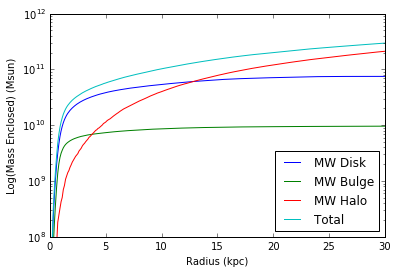

In [16]:
# plot MASS ENCLOSED for MW within 30 kpc
plt.semilogy(radMWD,massMWD*1e10, label='MW Disk')
plt.semilogy(radMWB,massMWB*1e10, label='MW Bulge')
plt.semilogy(radMWH,massMWH*1e10, label ='MW Halo')
plt.semilogy(radMWD,(massMWD+massMWB+massMWH)*1e10, 
                      label = 'Total')
plt.ylabel('Log(Mass Enclosed) (Msun)')
plt.xlabel('Radius (kpc)')
plt.xlim(0,50)
plt.ylim(1e8,1e12)
plt.legend(loc=4)

(0, 260)

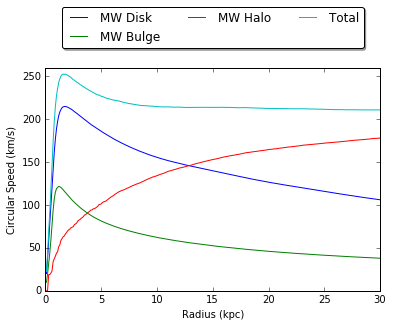

In [27]:
# plot the rotation curve for the MW within 30 kpc

plt.plot(radMWD,vCMWD, label='MW Disk')
plt.plot(radMWB,vCMWB, label='MW Bulge')
plt.plot(radMWH,vCMWH, label ='MW Halo')
plt.plot(radMWD,np.sqrt(vCMWD**2 + vCMWB**2 + vCMWH**2), 
                  label = 'Total')
plt.ylabel('Circular Speed (km/s)')
plt.xlabel('Radius (kpc)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)
plt.xlim(0,30)
plt.ylim(0,260)

The MW rotation curve peaks at ~ 250 km/s 
But it does so too close in - it should peak around 8 kpc.  The disk must have evolved from the initial conditions (not perfectly stable) - in particular, a bar forms that concentrates the mass in the center.  

In [17]:
#Q : 3  Hernquist Halo See Solutions for derivation

def HernquistVC(r,scale,Mtot):
     # gravitational constant in units of kpc^3/Gyr^2/Msun
    G = 4.498768e-6
    return (G*Mtot/(r+scale)**2*r)**0.5


def HernquistM(r,scale,Mtot):
     # gravitational constant in units of kpc^3/Gyr^2/Msun
    G = 4.498768e-6
    return Mtot*r**2/(r+scale)**2


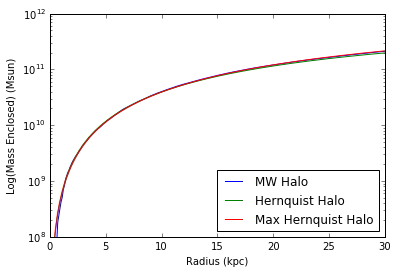

In [18]:
# comparing the mass profile of the MW to that of the Hernquist Halo 

plt.semilogy(radMWH,massMWH*1e10, label='MW Halo')
plt.semilogy(radMWH, HernquistM(radMWH,49,HMW300*1e10), label='Hernquist Halo' )
# if you used the maximal mass of the whole halo , would get a different scale radius
plt.semilogy(radMWH, HernquistM(radMWH,61,1.975e12), label='Max Hernquist Halo' )

plt.ylabel('Log(Mass Enclosed) (Msun)')
plt.xlabel('Radius (kpc)')
plt.xlim(0,30)
plt.ylim(1e8,1e12)
plt.legend(loc=4)

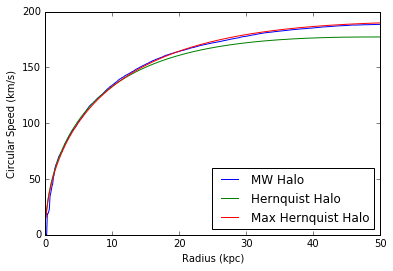

In [19]:
# comparing the rotation curve of the MW to that of the Hernquist Halo

plt.plot(radMWH,vCMWH, label='MW Halo')
plt.plot(radMWH, HernquistVC(radMWH,49,HMW300*1e10), label='Hernquist Halo' )
# using maximal MW mass
plt.plot(radMWH, HernquistVC(radMWH,61,1.975e12), label='Max Hernquist Halo' )

plt.ylabel('Circular Speed (km/s)')
plt.xlabel('Radius (kpc)')
plt.xlim(0,50)
plt.legend(loc=4)

MW Hernquist comparison

Best fit scale radius = 49 if using M(< 300 kpc) --> not a good fit at large radii
Best fit scale radius = 61 if using total halo mass 

In [33]:
## M31 
# use code to create arrays that store the mass enclosed within 50 kpc for each component

radM31D, mM31D, vCM31D, DM31300 = MassVcInR(50,"M31",2,0)
radM31B, mM31B, vCM31B, BM31300 = MassVcInR(50,"M31",3,0)
radM31H, mM31H, vCM31H, HM31300 = MassVcInR(50,"M31",1,0)

COM -378.0 611.0 -285.0
Maximal Mass M31, particle type 2 x 1e10 Msun 12.0
COM -378.0 611.0 -285.0
Maximal Mass M31, particle type 3 x 1e10 Msun 1.904997
COM -378.0 611.0 -285.0
Maximal Mass M31, particle type 1 x 1e10 Msun 192.088


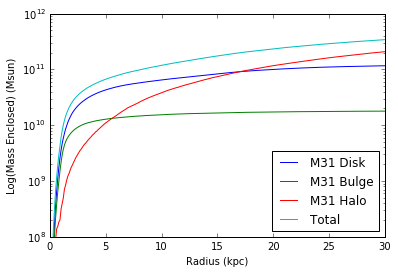

In [35]:
# plot MASS ENCLOSED for M31 within 30 kpc
plt.semilogy(radM31D,mM31D*1e10, label='M31 Disk')
plt.semilogy(radM31B,mM31B*1e10, label='M31 Bulge')
plt.semilogy(radM31H,mM31H*1e10, label ='M31 Halo')
plt.semilogy(radM31D,(mM31D+mM31B+mM31H)*1e10, label = 'Total')
plt.ylabel('Log(Mass Enclosed) (Msun)')
plt.xlabel('Radius (kpc)')
plt.xlim(0,30)
plt.ylim(1e8,1e12)
plt.legend(loc=4)

(0, 260)

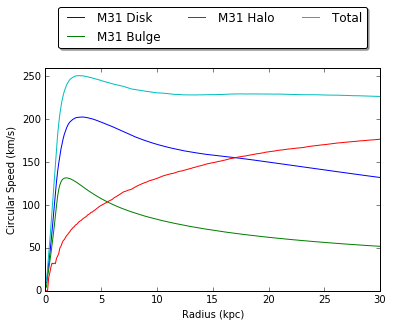

In [36]:
# plot the rotation curve for the M31 within 30 kpc
G = 4.498768e-6

plt.plot(radM31D,vCM31D, label='M31 Disk')
plt.plot(radM31B,vCM31B, label='M31 Bulge')
plt.plot(radM31H,vCM31H, label ='M31 Halo')
plt.plot(radM31D,np.sqrt(vCM31D**2 + vCM31B**2 + vCM31H**2), label = 'Total')
plt.ylabel('Circular Speed (km/s)')
plt.xlabel('Radius (kpc)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)
plt.xlim(0,30)
plt.ylim(0,260)

M31 rotation curve peaks at about 250 - also too close in, compared to observations.

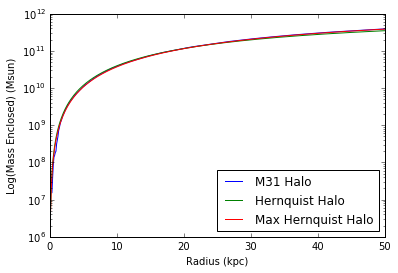

In [38]:
# compare the mass profile of M31 to that of the Hernquist halo
plt.semilogy(radM31H,mM31H*1e10, label='M31 Halo')
plt.semilogy(radM31H, HernquistM(radM31H,48,HM31300*1e10), label='Hernquist Halo' )
# if you used the maximal mass of the whole halo , would get a different scale radius
line3, = plt.semilogy(radM31H, HernquistM(radM31H,62.0,1.92e12), label='Max Hernquist Halo' )

plt.ylabel('Log(Mass Enclosed) (Msun)')
plt.xlabel('Radius (kpc)')
plt.xlim(0,50)
plt.legend(loc=4)

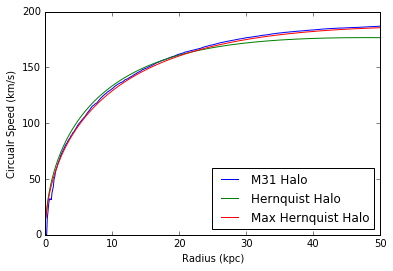

In [39]:
# comparing the rotation curve to that of the Hernquist Halo

plt.plot(radM31H,vCM31H, label='M31 Halo')
plt.plot(radM31H, HernquistVC(radM31H,48,HM31300*1e10), label='Hernquist Halo' )
plt.plot(radM31H, HernquistVC(radM31H,62.0,1.92e12), label='Max Hernquist Halo' )

plt.ylabel('Circualr Speed (km/s)')
plt.xlabel('Radius (kpc)')
plt.xlim(0,50)
plt.legend(loc=4)

For M31
Best fit scale radius = 48 if using M(< 300 kpc) --> Don't get the greatest fit at larger radii

Best fit scale radius = 62 if using Mtot halo  --> Same as the MW -- total masses are roughly the same 

In [40]:
# M33 
# use code to create arrays that store the mass enclosed within 30 kpc
# for each component and the circular rotation speed

radM33D, mM33D, vCM33D, DM33300 = MassVcInR(50,"M33",2,0)
radM33H, mM33H, vCM33H, HM33300 = MassVcInR(50,"M33",1,0)


COM -476.0 491.0 -412.0
Maximal Mass M33, particle type 2 x 1e10 Msun 0.93
COM -476.0 491.0 -412.0
Maximal Mass M33, particle type 1 x 1e10 Msun 18.6613


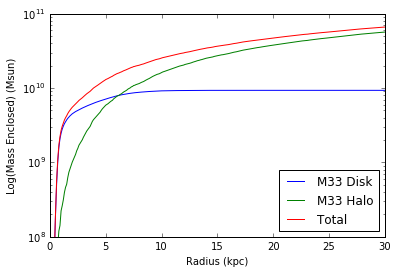

In [41]:
# plot MASS ENCLOSED for M33 within 30 kpc 
plt.semilogy(radM33D,mM33D*1e10, label='M33 Disk')
plt.semilogy(radM33H,mM33H*1e10, label ='M33 Halo')
plt.semilogy(radM33D,(mM33D+mM33H)*1e10, label = 'Total')
plt.ylabel('Log(Mass Enclosed) (Msun)')
plt.xlabel('Radius (kpc)')
plt.xlim(0,30)
plt.ylim(1e8,1e11)
plt.legend(loc=4)

(0, 30)

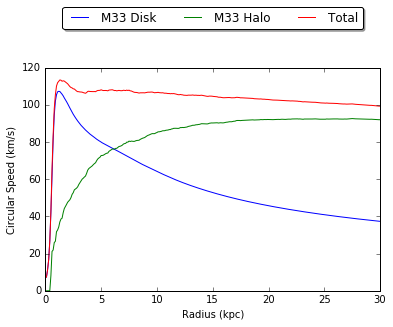

In [42]:
# plot the rotation curve for the M33 within 30 kpc

plt.plot(radM33D,vCM33D, label='M33 Disk')
plt.plot(radM33H,vCM33H, label ='M33 Halo')
plt.plot(radM33D,np.sqrt(vCM33D**2 + vCM33H**2), label = 'Total')
plt.ylabel('Circular Speed (km/s)')
plt.xlabel('Radius (kpc)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=3, fancybox=True, shadow=True)
plt.xlim(0,30)

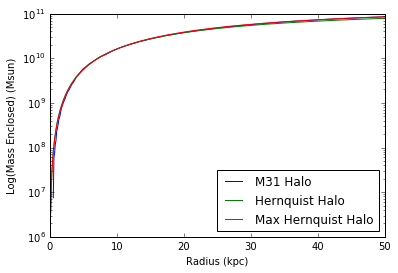

In [44]:
# compare the mass profile of M33 to that of the Hernquist halo
plt.semilogy(radM33H,mM33H*1e10, label='M31 Halo')
plt.semilogy(radM33H, HernquistM(radM33H,21.5,HM33300*1e10), label='Hernquist Halo' )
# if you used the maximal mass of the whole halo , would get a different scale radius
plt.semilogy(radM33H, HernquistM(radM33H,24,18.66*1e10), label='Max Hernquist Halo' )

plt.ylabel('Log(Mass Enclosed) (Msun)')
plt.xlabel('Radius (kpc)')
plt.xlim(0,50)
plt.legend(loc=4)

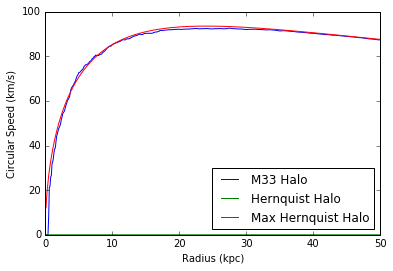

In [45]:
# comparing the rotation curve of M33 to that of the Hernquist Halo

plt.plot(radM33H,vCM33H, label='M33 Halo')
plt.plot(radM33H, HernquistVC(radM33H,21.5,HM33300), label='Hernquist Halo')
plt.plot(radM33H, HernquistVC(radM33H,24,18.66*1e10), label='Max Hernquist Halo' )

plt.ylabel('Circular Speed (km/s)')
plt.xlabel('Radius (kpc)')
plt.xlim(0,50)
plt.legend(loc=4)

For M33
Best fit scale radius = 21.5 if using M(< 300 kpc) --> don't get a great fit at large radii.
Best fit scale radius = 24 if using Mtot halo 